In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

results = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date = list(np.ravel(results))[0]

In [11]:
latest_date = dt.datetime.strptime(date, '%Y-%m-%d')
latest_date

datetime.datetime(2017, 8, 23, 0, 0)

In [12]:
latest_year = int(dt.datetime.strftime(latest_date, '%Y'))


In [13]:
latest_month = int(dt.datetime.strftime(latest_date, '%m'))
                 

In [14]:
latest_day = int(dt.datetime.strftime(latest_date, '%d'))


In [15]:
year_before = dt.date(latest_year, latest_month, latest_day) - dt.timedelta(days=365)

In [16]:
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_before)\
                .order_by(Measurement.date).all()
prcp_data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [17]:
df = pd.DataFrame(prcp_data)
df_1 = df.set_index('date')
df_1

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [18]:
df_1_sorted = df_1.sort_index(ascending=True)
df_1_sorted

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


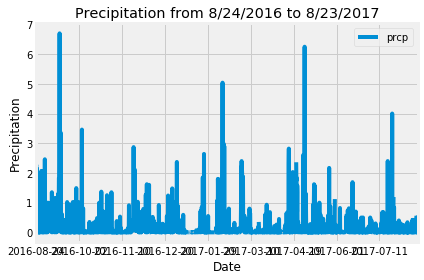

In [19]:
df_1_sorted.plot(title='Precipitation from 8/24/2016 to 8/23/2017')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [20]:
df_1_sorted.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [22]:
# Design a query to show how many stations are available in this dataset?
count = session.query(Station).count()
print(f"{count} stations are available in this dataset")

9 stations are available in this dataset


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station))\
                              .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_id = station_count[0][0]
station_name = session.query(Station.name).filter_by(station = station_id)
station_name = station_name[0][0]
print(f"The most active station is {station_id}: {station_name}")

The most active station is USC00519281: WAIHEE 837.5, HI US


In [25]:
highest_temp = session.query(Measurement.tobs).filter(Measurement.station == station_id)\
                .order_by(Measurement.tobs.desc()).first()
highest_temp = highest_temp[0]
print(f"Highest Temperature is {highest_temp}")

Highest Temperature is 85.0


In [26]:
lowest_temp = session.query(Measurement.tobs).filter(Measurement.station == station_id)\
                .order_by(Measurement.tobs).first()
lowest_temp = lowest_temp[0]
print(f"Lowest temperature is {lowest_temp}")

Lowest temperature is 54.0


In [27]:
avg_temp = session.query(Measurement.tobs).filter(Measurement.station == station_id).first()
avg_temp = avg_temp[0]
print(f"The average temperature is {avg_temp_1}")

NameError: name 'avg_temp_1' is not defined

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_latest = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > year_before)\
                    .filter(Measurement.station == station_id).order_by(Measurement.date).all()
station_latest

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [29]:
df_station = pd.DataFrame(station_latest)
df_station = df_station.set_index('date')
df_station = df_station.sort_index(ascending=True)
df_station

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


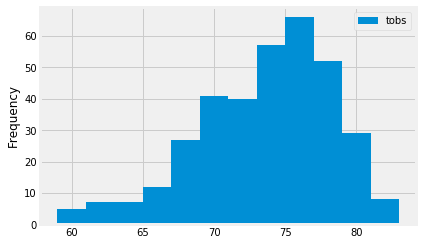

In [30]:
df_station.plot(kind='hist', bins=12)
plt.show()

![precipitation](Images/station-histogram.png)

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start_date = '2019-07-04'
trip_end_date = '2019-07-17'
start_date = '2017-07-04'
end_date = '2017-07-17'
trip_temp = calc_temps(start_date, end_date)
trip_temp

[(69.0, 78.11363636363636, 82.0)]

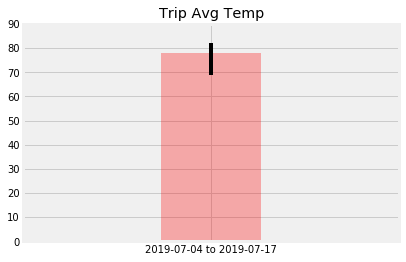

In [43]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip = '2019-07-04 to 2019-07-17'
min_temp = trip_temp[0][0]
max_temp = trip_temp[0][2]
avg_temp = trip_temp[0][1]

min_error = avg_temp - min_temp
max_error = max_temp - avg_temp

error_bars = np.array([[min_error], [max_error]])

plt.bar(trip, avg_temp, yerr = error_bars, color='red', alpha = 0.3 )
plt.ylim(0,90)
plt.xlim(-1.5,1.5)
plt.title('Trip Avg Temp')
plt.show()

In [75]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = ([Station.station, Station.name, Station.latitude, Station.longitude, 
        Station.elevation, func.sum(Measurement.prcp)])
rainfall = (session.query(*sel).filter(Station.station == Measurement.station)
            .filter(Measurement.date >= start_date).filter(Measurement.date <= end_date)
            .group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all())

rainfall

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  2.7600000000000002),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  1.57),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  0.7800000000000001),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.67),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.18),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.11),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

## Optional Challenge Assignment

In [85]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [86]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
start_date = '2019-07-04'
end_date = '2019-07-17'
start_num = int(start_date[-2:])
end_num = int(end_date[-2:])
trip_length = end_num - start_num
start_date = dt.datetime.strptime(start_date, '%Y-%m-%d')
date_list = [dt.datetime.strftime(start_date + dt.timedelta(days=x), '%m-%d')for x in range(0,trip_length)]
date_list

['07-04',
 '07-05',
 '07-06',
 '07-07',
 '07-08',
 '07-09',
 '07-10',
 '07-11',
 '07-12',
 '07-13',
 '07-14',
 '07-15',
 '07-16']

In [87]:
trip_normals = [daily_normals(date) for date in date_list]
trip_normals

[[(70.0, 76.57142857142857, 81.0)],
 [(66.0, 75.0, 81.0)],
 [(69.0, 75.0, 81.0)],
 [(69.0, 74.91071428571429, 82.0)],
 [(69.0, 76.08333333333333, 83.0)],
 [(68.0, 76.19298245614036, 83.0)],
 [(68.0, 75.62068965517241, 82.0)],
 [(70.0, 75.78947368421052, 81.0)],
 [(67.0, 75.96491228070175, 82.0)],
 [(69.0, 76.1896551724138, 81.0)],
 [(61.0, 76.2280701754386, 82.0)],
 [(68.0, 76.2542372881356, 82.0)],
 [(70.0, 76.34482758620689, 83.0)]]

In [97]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_normals_1 = [np.array(normal[0])for normal in trip_normals]
trip_normals_1

df = pd.DataFrame(trip_normals_1)
df['Date'] = date_list
df = df.set_index('Date')
df

,0,1,2
Date,,,
07-04,70.0,76.571429,81.0
07-05,66.0,75.000000,81.0
07-06,69.0,75.000000,81.0
07-07,69.0,74.910714,82.0
07-08,69.0,76.083333,83.0
07-09,68.0,76.192982,83.0
07-10,68.0,75.620690,82.0
07-11,70.0,75.789474,81.0
07-12,67.0,75.964912,82.0


In [98]:
df_1 = df.rename(columns={0:'Low Temp', 1:'Avg Temp', 2:'Max Temp'})
df_1

,Low Temp,Avg Temp,Max Temp
Date,,,
07-04,70.0,76.571429,81.0
07-05,66.0,75.000000,81.0
07-06,69.0,75.000000,81.0
07-07,69.0,74.910714,82.0
07-08,69.0,76.083333,83.0
07-09,68.0,76.192982,83.0
07-10,68.0,75.620690,82.0
07-11,70.0,75.789474,81.0
07-12,67.0,75.964912,82.0


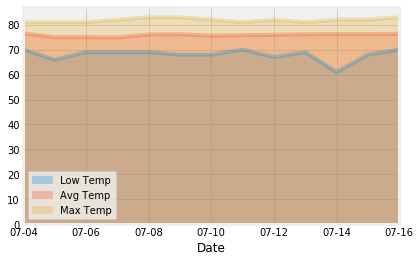

In [101]:
# Plot the daily normals as an area plot with `stacked=False`
df_1.plot.area(stacked=False, alpha=0.3)